In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)


1 Physical GPUs, 1 Logical GPUs


# Lyrics Generator: Title

To create a lyrics generator based on song titles, we'll need to do the following steps:

  1. Data Preprocessing: Load the dataset you've provided and prepare it for training a Recurrent Neural Network (RNN). This typically includes cleaning the text, tokenizing, and encoding it into sequences that the model can learn from.

2. Model Design: Define an RNN architecture that is suitable for text generation. This usually involves LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit) layers which are good at capturing long-range dependencies in text.

3. Training: Train the RNN on the preprocessed dataset. During this phase, the model will learn to predict the next word in a sequence based on the previous words.

4. Lyrics Generation: Implement a generation loop where we feed a song title (and possibly some starting text) into the model, and the model generates a sequence of text that forms the lyrics.

5. Output Presentation: Design the output to be user-friendly and visually appealing.

## Exploratory Data Analysis (EDA)
We'll start by conducting an initial exploration of the dataset to understand its characteristics. This will include visualizations to comprehend the distribution of song lengths, word frequencies, and the diversity of artists and song titles.

In [ ]:
import pandas as pd

# Load the dataset
songs_data = pd.read_csv('./Songs.csv')

# Display the first few rows of the dataframe to understand its structure
songs_data.head()

,Artist,Title,Lyrics
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co..."
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a..."
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...
3,Taylor Swift,the 1,"I'm doing good, I'm on some new sh*t\nBeen say..."
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...


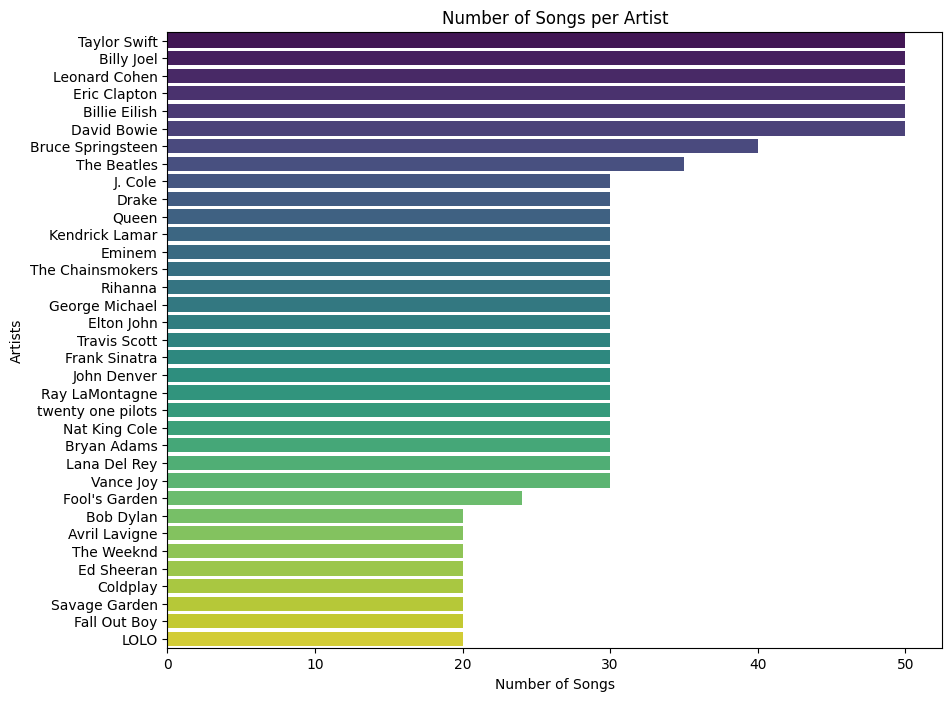

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Basic statistics
artist_counts = songs_data['Artist'].value_counts()
song_lengths = songs_data['Lyrics'].str.split().str.len()

# Visualization of song count per artist
plt.figure(figsize=(10,8))
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette="viridis")
plt.title('Number of Songs per Artist')
plt.xlabel('Number of Songs')
plt.ylabel('Artists')
plt.show()

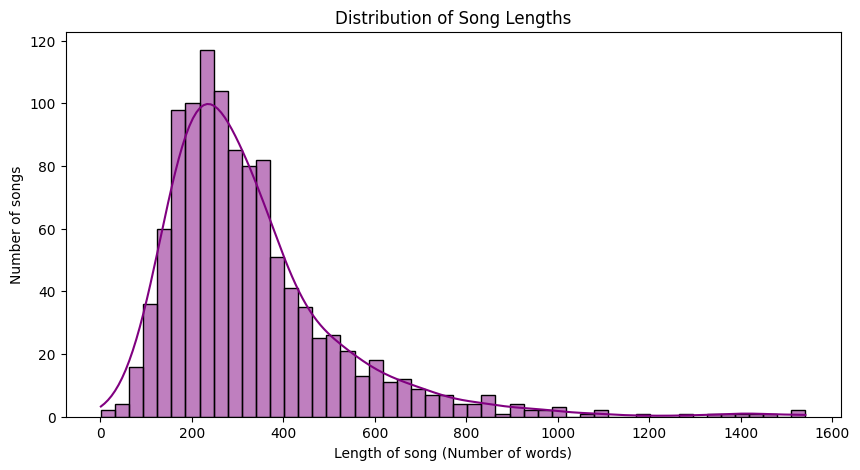

In [ ]:
# Visualization of song length distribution
plt.figure(figsize=(10,5))
sns.histplot(song_lengths, bins=50, kde=True, color='purple')
plt.title('Distribution of Song Lengths')
plt.xlabel('Length of song (Number of words)')
plt.ylabel('Number of songs')
plt.show()

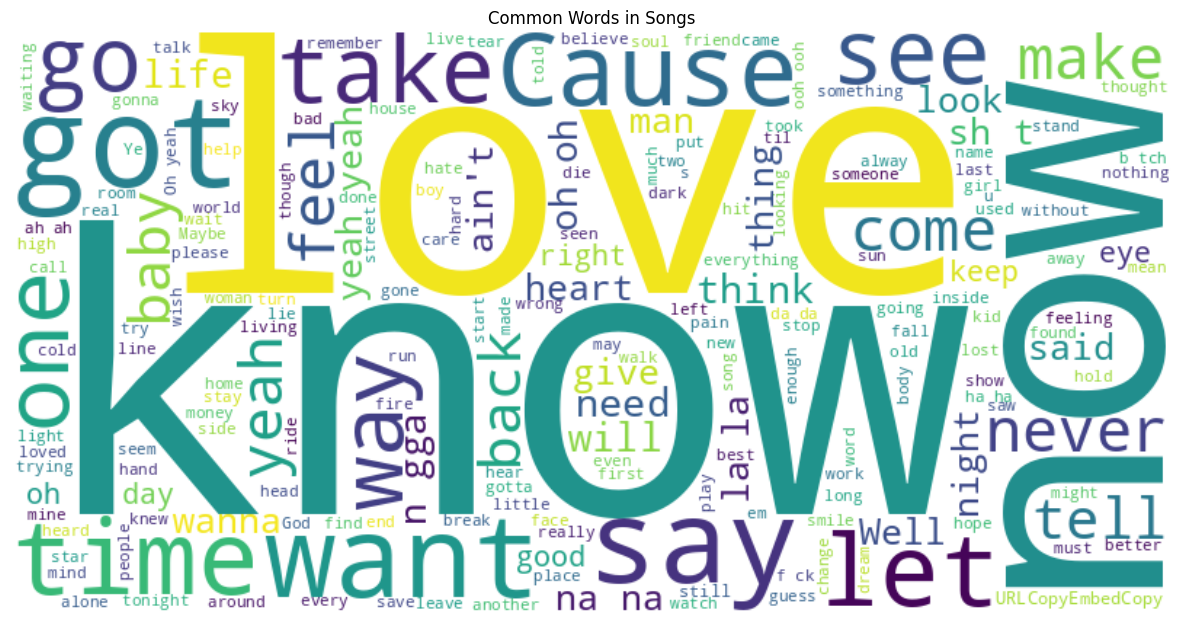

In [ ]:
# Word cloud for the most common words in the dataset
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(songs_data['Lyrics']))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Songs')
plt.show()

### Exploratory Data Analysis (EDA) Results

The visualizations provide the following insights:

1. **Number of Songs per Artist**: The bar chart shows the distribution of the number of songs for each artist in the dataset.

2. **Distribution of Song Lengths**: The histogram displays the variation in song lengths, measured in the number of words per song. This helps us understand the average length of the lyrics and how verbose or concise the songs are.

3. **Common Words in Songs**: The word cloud gives us a visual representation of the most common words found in the lyrics. The size of each word indicates its frequency.

With these insights, we can proceed to data preprocessing. We'll tokenize the lyrics into words, convert the words into sequences, and numerically encode these sequences.

In [5]:
! pip install transformers

In [6]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.eval()  # Set the model to evaluation mode

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [23]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model tokenizer (vocabulary) and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.eval()  # Set the model to evaluation mode

# Define the prompt with the song title and an indicator to start the lyrics
prompt = "Title: Long Distance Love\nLyrics:\n"
# Encode the prompt text to token ids
input_ids = tokenizer.encode(prompt, return_tensors='pt')
# Generate the lyrics with modified parameters
lyrics_output = model.generate(
    input_ids,
    max_length=300,
    temperature=1.,
    top_p=0.9,
    no_repeat_ngram_size=2,
    num_return_sequences=1,
    pad_token_id=tokenizer.eos_token_id
)
# Decode and print the generated lyrics
lyrics = tokenizer.decode(lyrics_output[0], skip_special_tokens=True)
print(lyrics)


Title: Long Distance Love
Lyrics:
I'm a girl, I'm not a boy, but I am a man.
And I love you, and I want you to love me. I don't want to be a woman, so I'll be your wife. And I will be the one who will love and love. So I can't be anything else. But I know that I have to. Because I've been through so much. It's been so hard. You know, it's hard to get through. The hardest thing is to go through it. To go to school, to work, you know. That's the hardest part. When you go out and you're like, "Oh, my God, that's so fucking hard," you don. Like, what's going on? You're not going to do it, because you've got to, like you said, go. Or you can go home and just go and do whatever you want. Just go, just do what you like. If you do that, then you'll do the same thing. No, no, not at all. Not at any point. There's no point in doing that. What's wrong with that? I mean, if you have a problem with it and it doesn't go away, why would you ever do anything about it? It doesn' go anywhere. Why would 

Explanation:

Model Choice: GPT-2 is chosen because it's one of the most advanced language models available that can be run locally without the need for an API. It understands context and can generate coherent and contextually relevant text based on prompts.

How the Model Works: GPT-2 uses a transformer architecture, which allows it to consider the entire context of the input text it generates from. It has multiple layers of attention mechanisms that let it focus on different parts of the input text when predicting the next word. The model outputs probabilities over the vocabulary for the next word, which is then sampled to produce the output text.

Visualizing Performance: For a pre-trained model in inference mode, performance visualization like loss graphs is not applicable because there's no training process involved. Instead, the quality of the generated text is the primary indicator of performance. You would review the generated lyrics and assess how well they align with the style, structure, and content expected from a song given its title.

In this code:

max_length is the maximum length of the sequence to be generated.

temperature controls the randomness of the output (higher value can lead to more creative text).

top_p is used for nucleus sampling, where we only consider the most probable next words.

no_repeat_ngram_size prevents the model from using the same n-gram more than once.